In [1]:
import numpy as np
from ase import units
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde, linregress, t
from sklearn.metrics import r2_score

mpl.rcParams["axes.linewidth"] =  1.5
mpl.rcParams["axes.grid"] = False

mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.spines.left"] = True
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.top"] = True
mpl.rcParams["axes.spines.right"] = True

mpl.rcParams["xtick.major.width"] = 1.5
mpl.rcParams["ytick.major.width"] = 1.5
mpl.rcParams["ytick.minor.visible"] = True
mpl.rcParams["xtick.minor.visible"] = True
mpl.rcParams["xtick.minor.width"] = 1.0
mpl.rcParams["ytick.minor.width"] = 1.0
mpl.rcParams["xtick.minor.size"] =  2.5
mpl.rcParams["ytick.minor.size"] =  2.5
mpl.rcParams["xtick.direction"] =  'in'
mpl.rcParams["ytick.direction"] =  'in'
mpl.rcParams["xtick.major.size"] =  5
mpl.rcParams["ytick.major.size"] =  5

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.weight'] ='bold'
mpl.rcParams['font.size'] = 12.0
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

%matplotlib inline


sols = ['meoh', 'wat']
zeos = ['st9', 'st7', 'st5', 't9', 't7', 't5']
temps = np.array([300, 325, 350, 375, 400, 425, 450, 475])
markers = ['o', 'v', '^', 's', 'd', 'X', "P", "*"]
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


def apply_kwargs(ax, x, y, kwargs):
    if kwargs is None:
        ax.plot(x, y)
    else:
        ax.plot(x, y, **kwargs)


def set_ticks(ax, xlinear=True, ylinear=False, xmax=False, ymax=True, yticks = 5, xticks = 5):
    ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(6))
    ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(6))
    if xlinear: ax.xaxis.set_major_locator(mpl.ticker.LinearLocator(xticks))
    if xmax: ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(xticks))
    if ylinear: ax.yaxis.set_major_locator(mpl.ticker.LinearLocator(yticks))
    if ymax: ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(yticks))


/Users/Woody/Programs/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


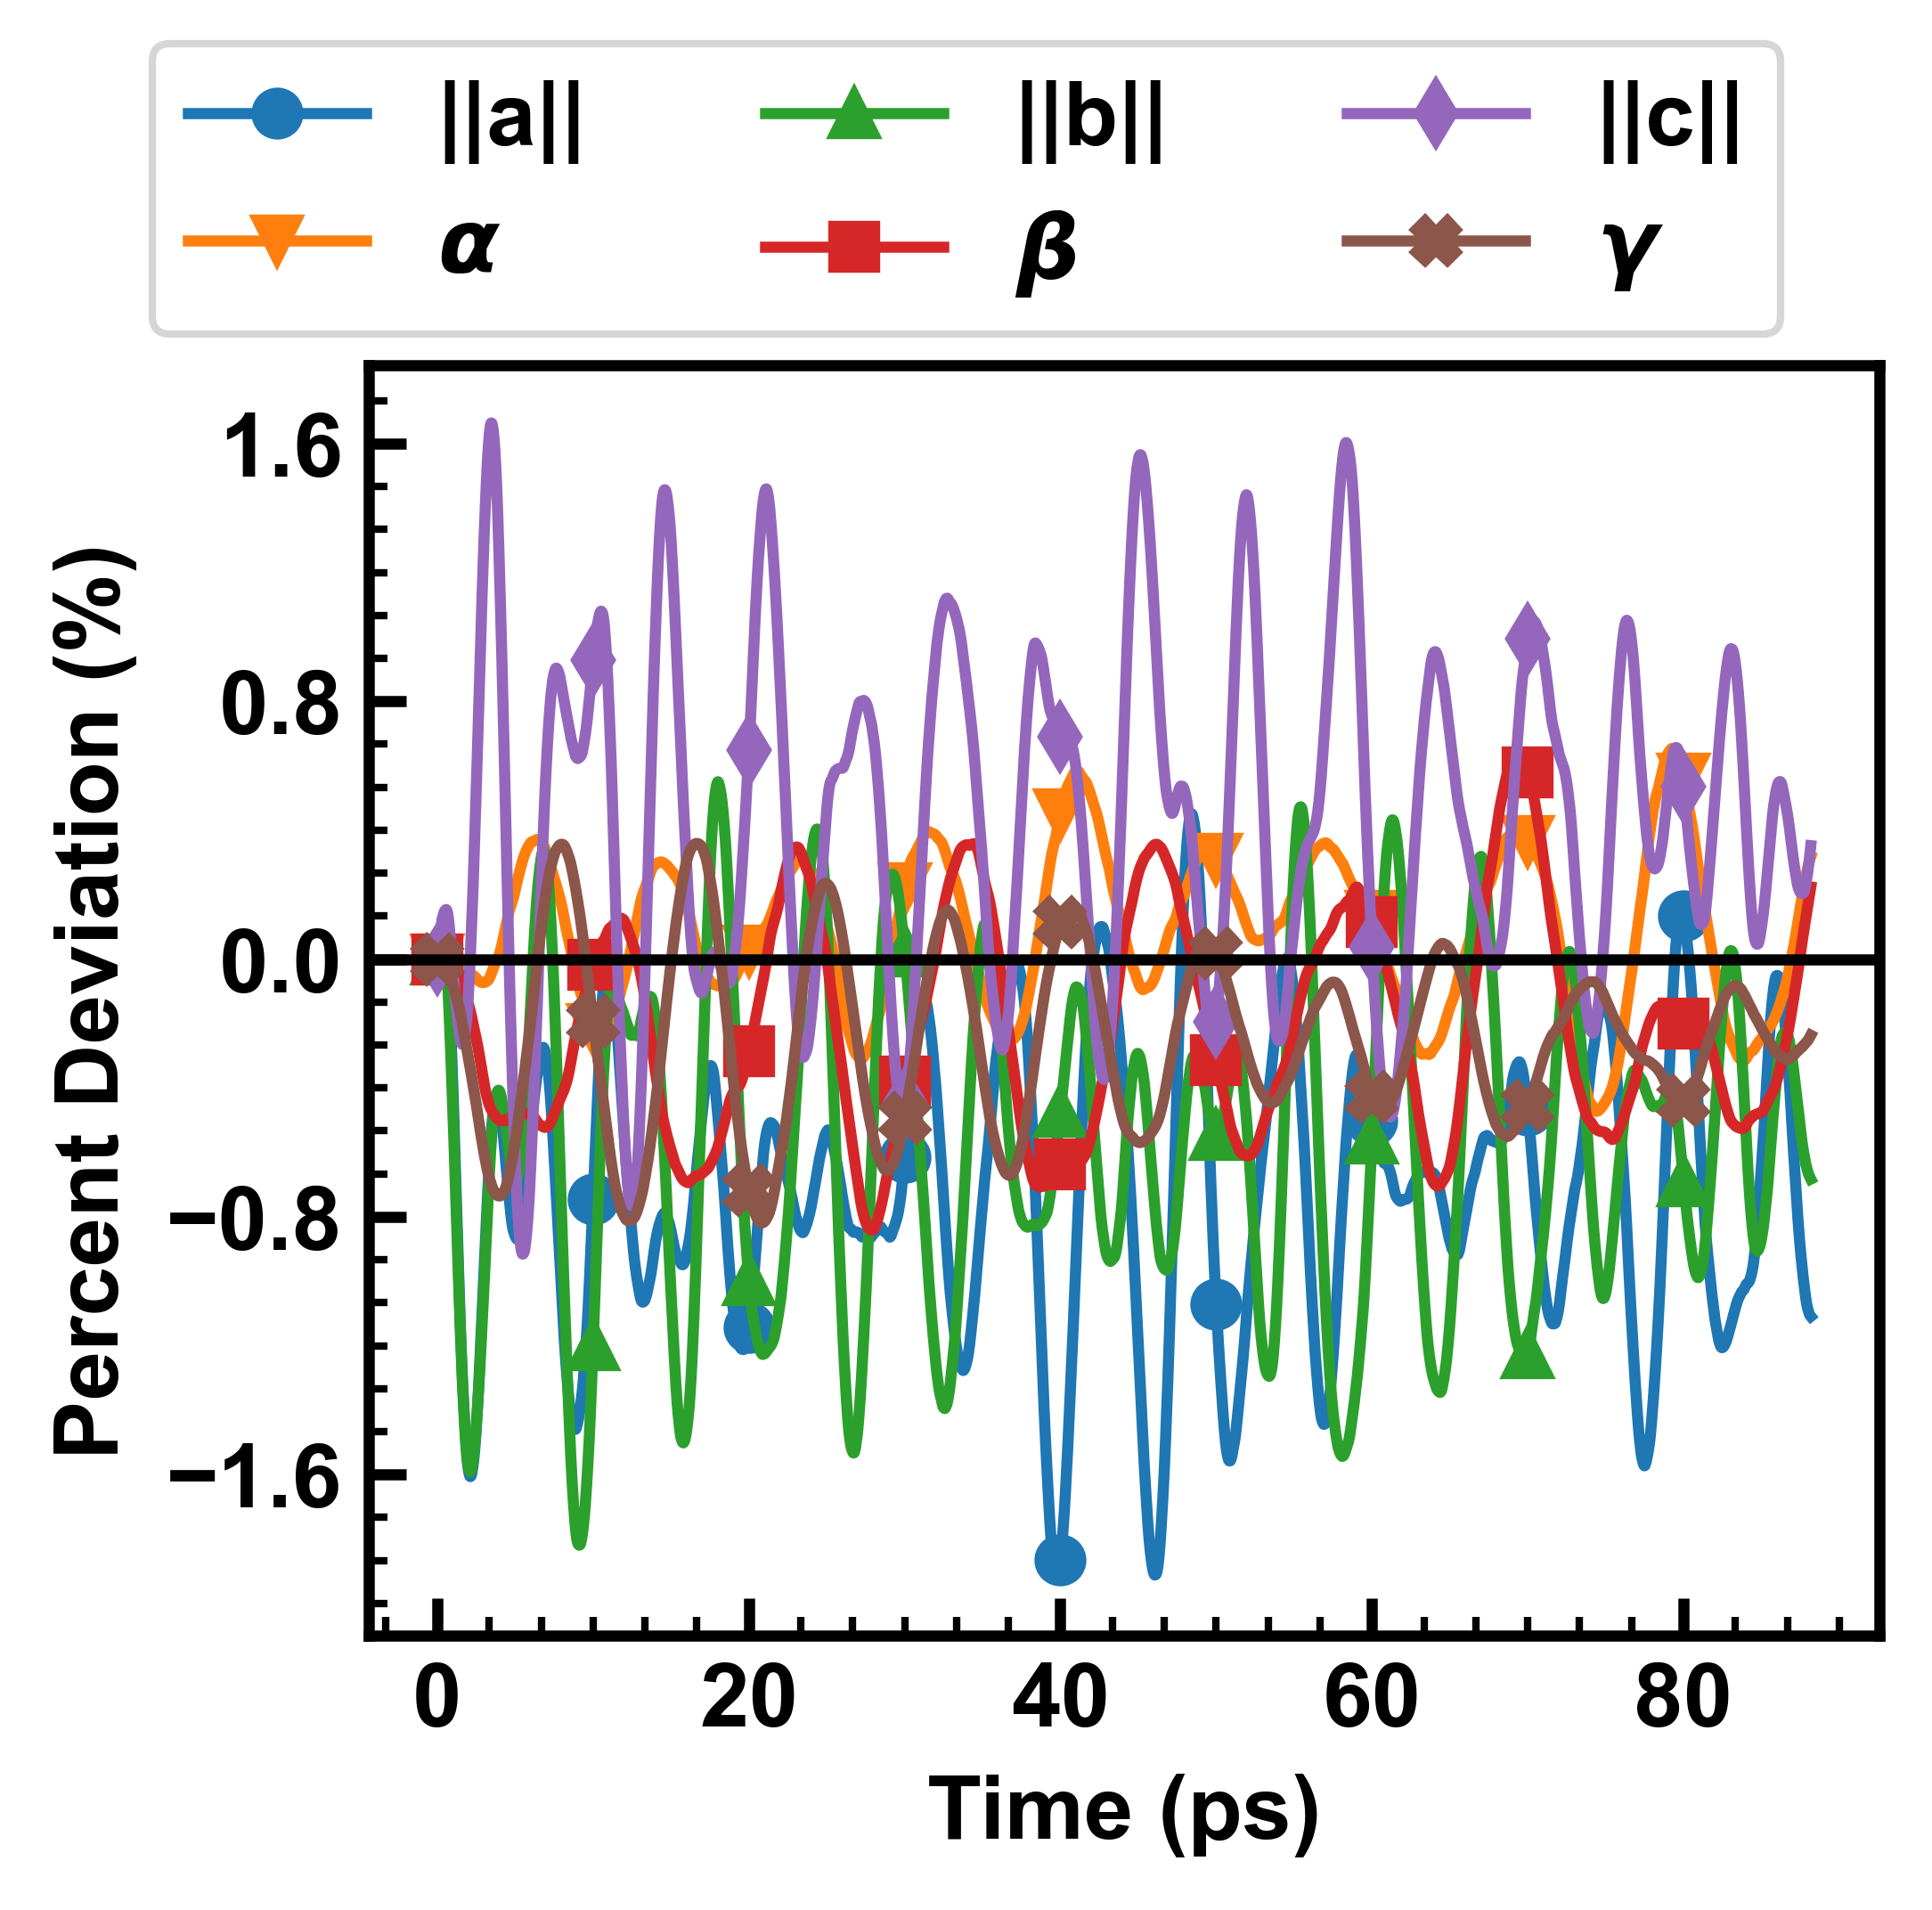

In [2]:
fig, axs = plt.subplots(
    nrows = 1, ncols = 1, 
    figsize=(3.5, 3.5), dpi=600, 
    sharex = False, sharey = False, 
    layout="constrained"
    )

errors = ["a_error", "alpha_error", "b_error", "beta_error", "c_error",  "gamma_error"]
labels = [r"||a||" , r"$\alpha$" , "||b||" , r"$\beta$", "||c||", r"$\gamma$"]


markers = ['o', 'v', '^', 's', 'd', 'X', "P", "*"]
for e, l, m  in zip(errors, labels, markers):
    error = np.load(f"lattice/{e}.npy")
    time = np.arange(len(error)) * 0.01
    axs.plot(time, error, label = l, marker = m, markevery = 1000)

plims = axs.get_xlim()
axs.hlines(0, plims[0], plims[1], color = "k")
axs.set_xlim(plims)

axs.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(6))
axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(6))
axs.yaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
axs.set_ylabel("Percent Deviation (%)")
axs.set_xlabel("Time (ps)")

fig.legend(ncols = 3, loc="outside upper center")

prefix = "lattice-errors"
for suffix in [".tiff", ".eps", ".pdf", ".png"]:
    fig.savefig(prefix+suffix)

pass

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


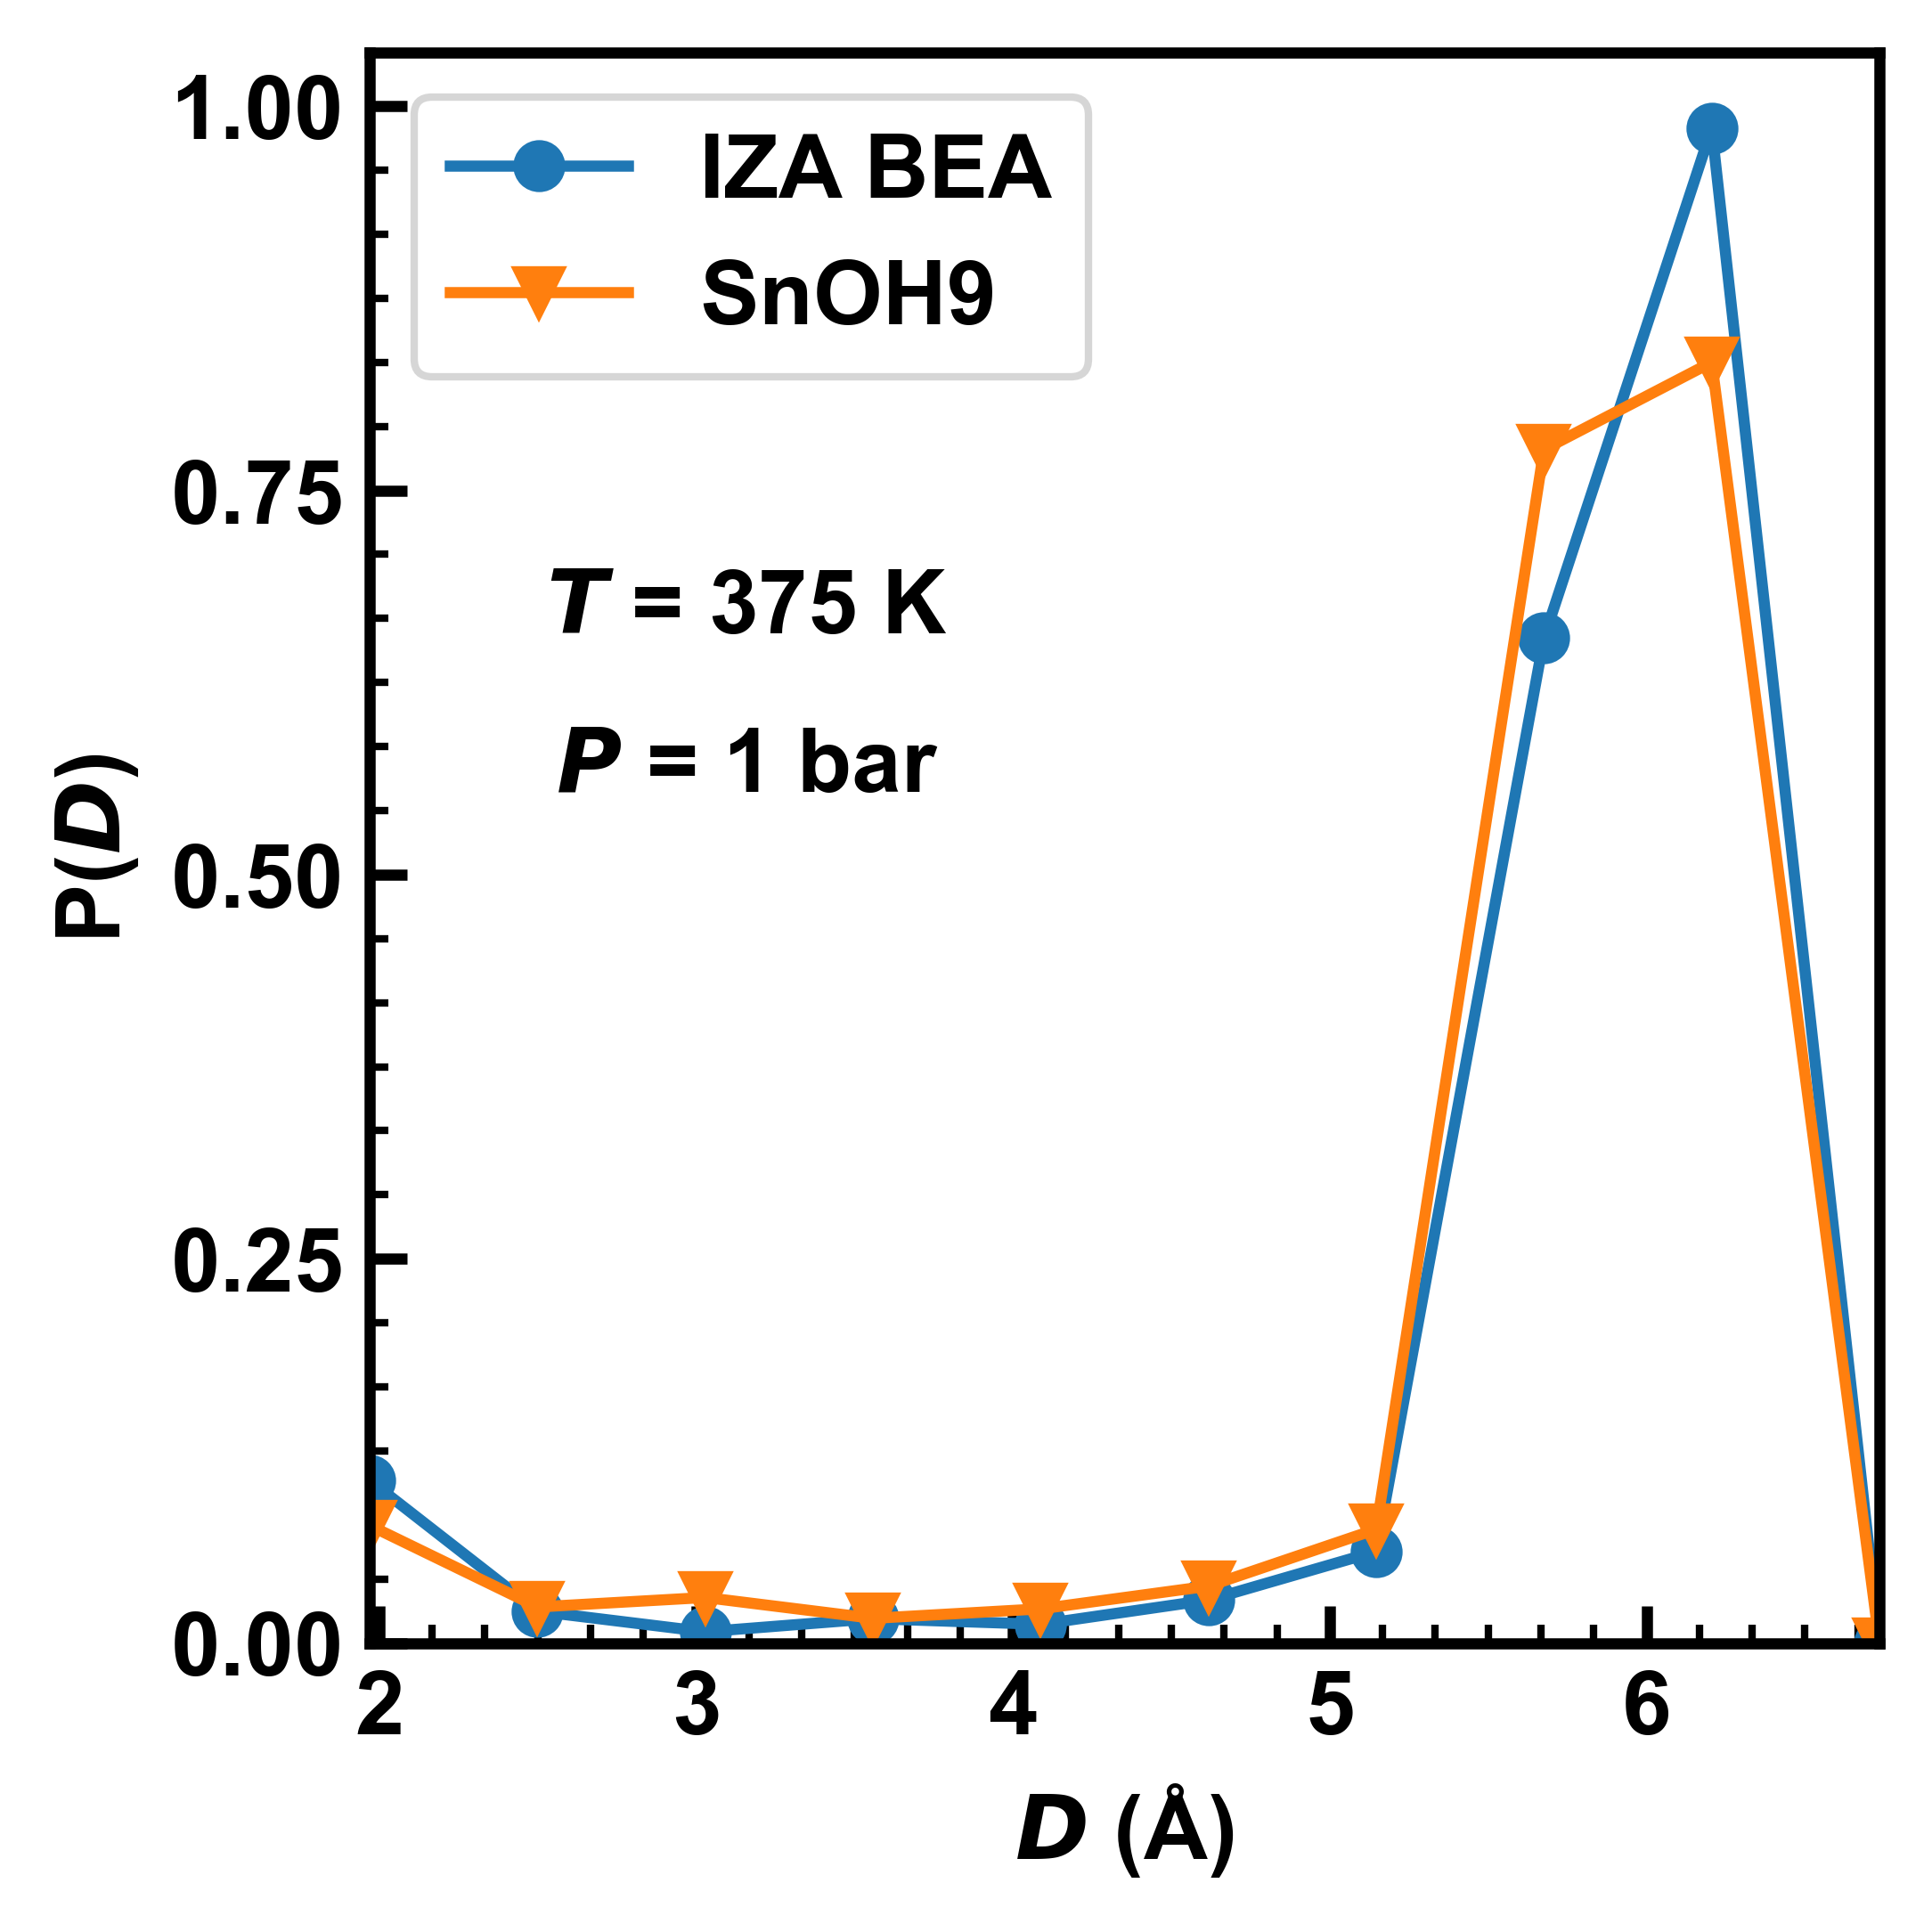

In [3]:
fig, axs = plt.subplots(
    nrows = 1, ncols = 1, 
    figsize=(3.5, 3.5), dpi=600, 
    sharex = False, sharey = False, 
    layout="constrained"
    )

#errors = ["a_error", "alpha_error", "b_error", "beta_error", "c_error",  "gamma_error"]
#labels = [r"||a||" , r"$\alpha$" , "||b||" , r"$\beta$", "||c||", r"$\gamma$"]
markers = ['o', 'v', '^', 's', 'd', 'X', "P", "*"]




psd_iza = 2.0*np.load('psd/IZA/pore_radii.npy')
psd_st9 = 2.0*np.load('psd/ST9-MACE/pore_radii.npy')


def plot_histogram(x, axs, label, marker):
    hist, bin_edges = np.histogram(x, bins = 10, range=(3.41/2.0, 7), density=True)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    axs.set_xlim((bin_centers[0], bin_centers[-1]))
    axs.plot(bin_centers, hist, label = label, marker = marker)
    


plot_histogram(psd_iza, axs, "IZA BEA", markers[0])
plot_histogram(psd_st9, axs, "SnOH9", markers[1])

plims = axs.get_ylim()
axs.set_ylim((0, plims[1]))


axs.text(
        0.25, 0.65,
        f"$T$ = 375 K",
        horizontalalignment='center',
        verticalalignment='center',
        transform = axs.transAxes,
    )

axs.text(
        0.25, 0.55,
        f"$P$ = 1 bar",
        horizontalalignment='center',
        verticalalignment='center',
        transform = axs.transAxes,
    )


axs.legend()

axs.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(6))
axs.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(6))
axs.yaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
axs.set_ylabel("P($D$)")
axs.set_xlabel("$D$ (Å)")

prefix = "psd"
for suffix in [".tiff", ".eps", ".pdf", ".png"]:
    fig.savefig(prefix+suffix)

pass